In [403]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [404]:
file = "sp_ka"
colnames = ['Loss']
train_losses = pd.read_csv(
    f'./resultados/{file}/train_loss_epoch_{file}.csv', names=colnames, header=None)
test_losses = pd.read_csv(
    f'./resultados/{file}/test_loss_epoch_{file}.csv', names=colnames, header=None)
dif_train = pd.read_csv(
    f'./resultados/{file}/train_loss_{file}.csv', names=colnames, header=None)
dif_test = pd.read_csv(
    f'./resultados/{file}/test_loss_{file}.csv', names=colnames, header=None)



In [405]:
dif_array = []
for index, row in dif_train.iterrows():
    dif_array.append(float(row.Loss[7:-1]))

for index, row in dif_test.iterrows():
    dif_array.append(float(row.Loss[7:-1]))

dif = pd.DataFrame({"Loss": dif_array})

In [406]:
dif_array.sort(reverse=True)
print(dif_array[0])
x = 0
bins = []
labels = []
while (True):
    string = f"Entre {x+1} e "
    bins.append(x)
    if(x > dif_array[0]):
        break
    x += 1000
    string += f"{x}"
    labels.append(string)


pd.cut(dif.Loss, bins,
       labels=labels, include_lowest=True).value_counts()

print(bins[31:35])
print(labels[31:35])

41496.6797
[31000, 32000, 33000, 34000]
['Entre 31001 e 32000', 'Entre 32001 e 33000', 'Entre 33001 e 34000', 'Entre 34001 e 35000']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


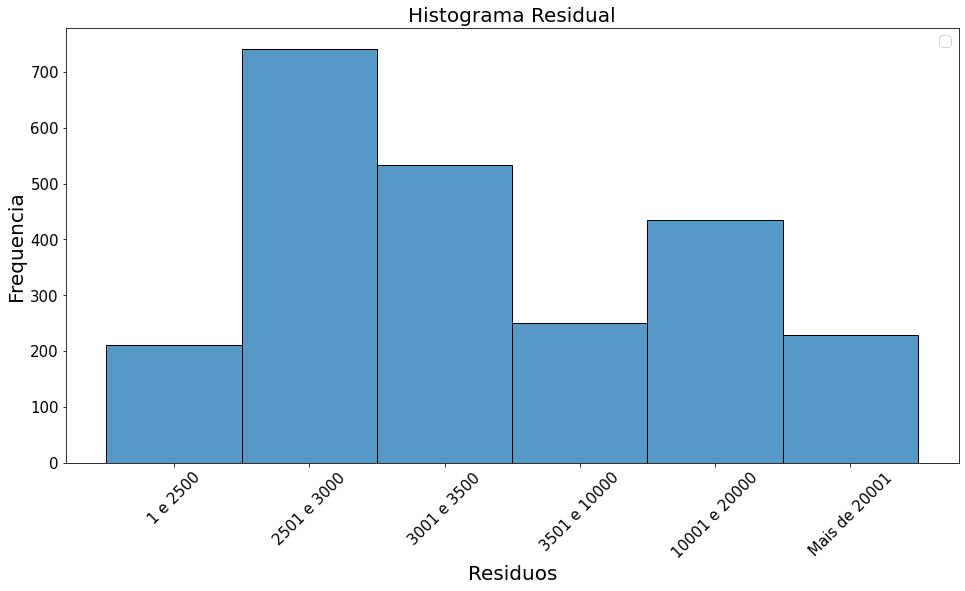

In [411]:
bins = [0, 2500, 3000, 3500, 10000, 20000, 42000] 
labels = ['1 e 2500', '2501 e 3000', '3001 e 3500', '3501 e 10000', '10001 e 20000', 'Mais de 20001']

dif_hist = pd.cut(dif.Loss, bins,
                  labels=labels, include_lowest=True)

plt.rc('legend', fontsize=15)
plt.rcParams['font.size'] = '15'

plt.figure(figsize=(16, 8))
sns.histplot(data=dif_hist, binwidth=3)
plt.xticks(rotation=45)
plt.xlabel('Residuos', fontsize=20)
plt.ylabel('Frequencia', fontsize=20)
plt.title('Histograma Residual', fontsize=20)
plt.legend()
